In [1]:
# !pip install numpy==1.21.0
# !pip install pandas==1.3.5
import pandas as pd
import os
%pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
import string
import re

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/samrawit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/samrawit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/samrawit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /home/samrawit/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/samrawit/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
# all_data_path = '../data/raw_analyst_ratings.csv'
# # df = util.read_csv_file(all_data_path)
# # from scripts.utility import read_csv_file
import sys
# import os

# # Add the 'scripts' directory to the sys.path
# sys.path.append(os.path.abspath('../helper_func'))

# from helper_func.utility import read_csv_file  # Now this should work

# # from utils import read_csv_file

# df = read_csv_file(all_data_path)


import os

print(os.getcwd())

sys.path.append(os.path.abspath('../scripts'))

# Now import the utility module from scripts
from utility import read_csv_file, clean_text

all_data_path = '../data/raw_analyst_ratings.csv'
df = read_csv_file(all_data_path)

/home/samrawit/Kifya AIM/Challenge 1/NovaSentimentAnalytics/notebooks


[nltk_data] Downloading package words to /home/samrawit/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/samrawit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/samrawit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/samrawit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
df = df.get("data")
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [10]:
df.columns

Index(['headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [11]:



# headline_column = df['headline']
df['headlineClean'] = df['headline'].apply(clean_text)

df[['headline', 'headlineClean']]

,headline,headlineClean
0,Stocks That Hit 52-Week Highs On Friday,stock hit week
1,Stocks That Hit 52-Week Highs On Wednesday,stock hit week
2,71 Biggest Movers From Friday,biggest
3,46 Stocks Moving In Friday's Mid-Day Session,stock moving midday session
4,B of A Securities Maintains Neutral on Agilent...,neutral price target
...,...,...
1407323,Top Narrow Based Indexes For August 29,top narrow based august
1407324,Recap: Wednesday's Top Percentage Gainers and ...,recap top percentage
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,update color china auto initiation
1407326,Oppenheimer Initiates China Zenix At Outperfor...,china outperform


In [12]:
# 1. Descriptive statistics for headline lengths
df['headline_length'] = df['headline'].apply(len)
headline_stats = df['headline_length'].describe()
print("Headline Length Statistics:\n", headline_stats)

Headline Length Statistics:
 count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [13]:
articles_per_publisher = df['publisher'].value_counts()
print("\nArticles Per Publisher:\n", articles_per_publisher)


Articles Per Publisher:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


In [14]:
# Ensure 'date' column is in datetime format before analyzing
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [15]:
articles_per_day = df['date'].dt.date.value_counts().sort_index()
print("\nArticles Per Day:\n", articles_per_day)



Articles Per Day:
 date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, Length: 2528, dtype: int64


In [16]:
most_active_day = articles_per_day.idxmax()
most_active_day_count = articles_per_day.max()
print(f"\nMost Active Day: {most_active_day} with {most_active_day_count} articles")



Most Active Day: 2020-03-12 with 973 articles


In [17]:
monthly_articles = df['date'].dt.to_period('M').value_counts().sort_index()
print("\nArticles Per Month:\n", monthly_articles)

/tmp/ipykernel_100967/328822985.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_articles = df['date'].dt.to_period('M').value_counts().sort_index()



Articles Per Month:
 date
2011-04       6
2011-05      78
2011-06      96
2011-07     137
2011-08     149
           ... 
2020-02    2356
2020-03    4680
2020-04    4616
2020-05    9333
2020-06    5990
Freq: M, Name: count, Length: 111, dtype: int64


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


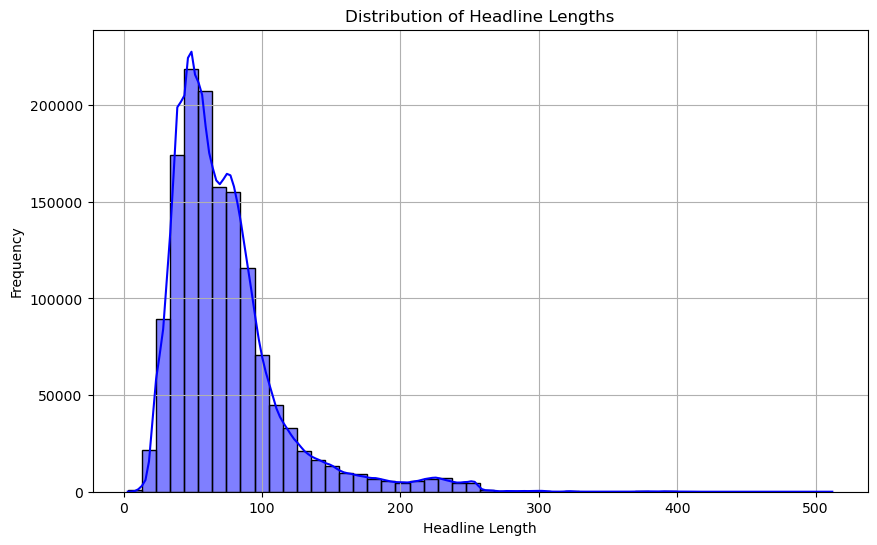

In [19]:
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# 1. Plot headline length distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], kde=True, color='blue', bins=50)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/tmp/ipykernel_100967/85048985.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['date'].dt.to_period('M')


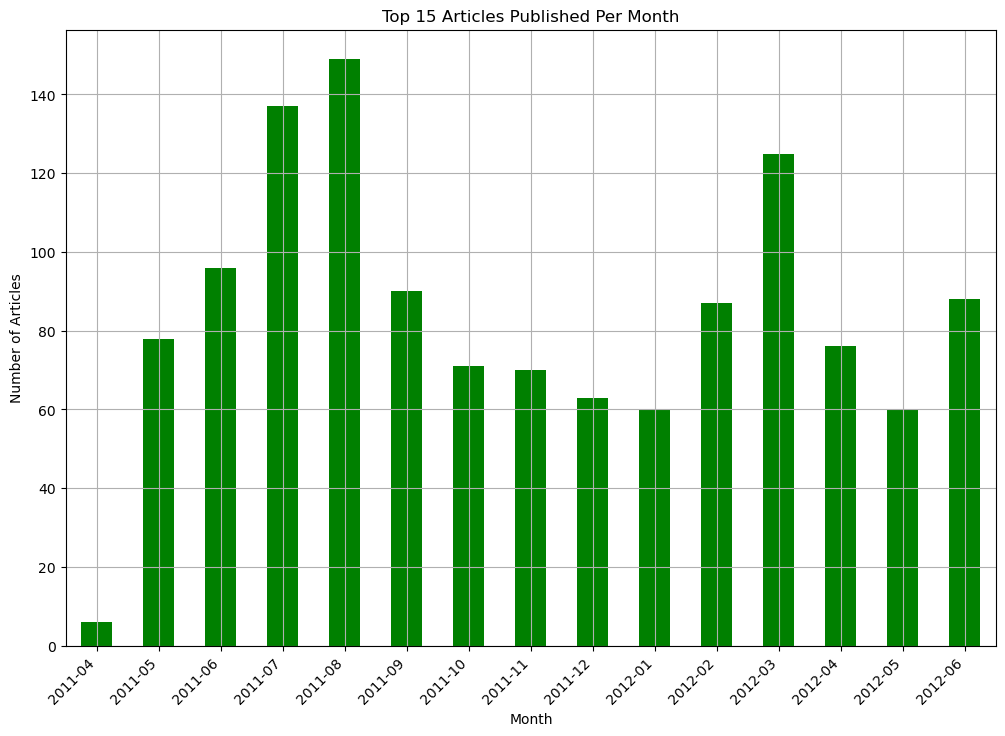

In [34]:
# 4. Plot articles per month (Bar Plot)
import matplotlib.pyplot as plt

# Step 1: Extract the month and year from the 'date' column (to group by month)
df['month'] = df['date'].dt.to_period('M')

# Step 2: Count the number of articles published each month
monthly_counts = df['month'].value_counts().sort_index()

# Step 3: Select the top 15 months (or all if you want to plot every month)
top_15_months = monthly_counts.head(15)

# Step 4: Plot the data
plt.figure(figsize=(12, 8))
top_15_months.plot(kind='bar', color='green')
plt.title('Top 15 Articles Published Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(True)
plt.show()


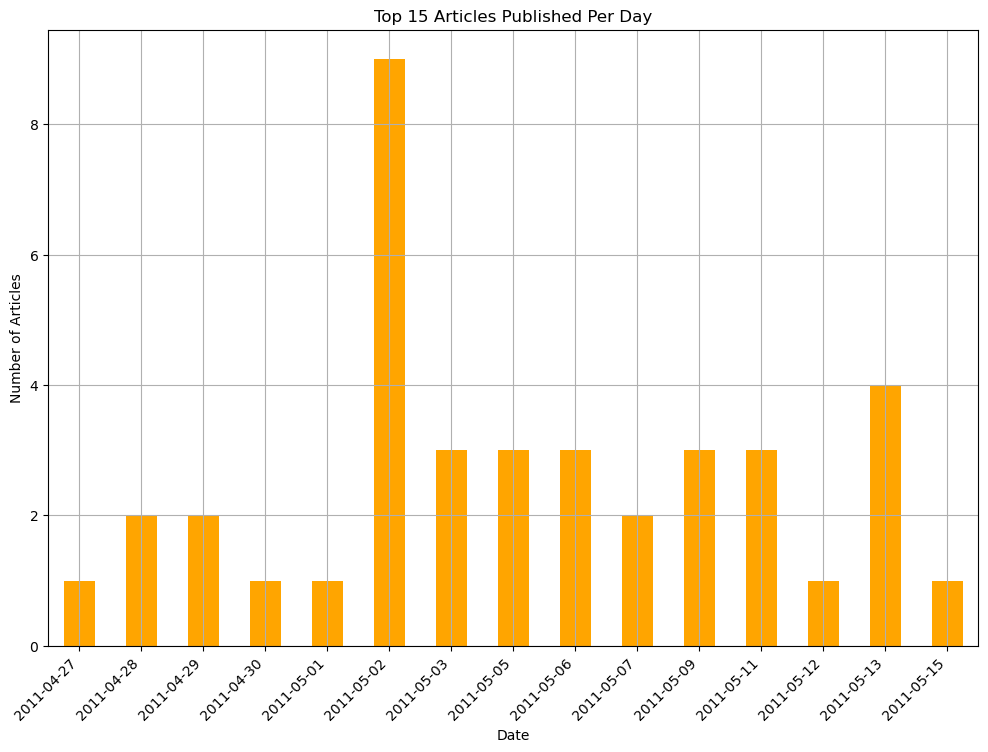

In [35]:
import matplotlib.pyplot as plt

# Step 1: Extract the date from the 'date' column (to group by day)
df['day'] = df['date'].dt.date

# Step 2: Count the number of articles published each day
daily_counts = df['day'].value_counts().sort_index()

# Step 3: Select the top 15 days (or all if you want to plot every day)
top_15_days = daily_counts.head(15)

# Step 4: Plot the data
plt.figure(figsize=(12, 8))
top_15_days.plot(kind='bar', color='orange')
plt.title('Top 15 Articles Published Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(True)
plt.show()


In [30]:
unique_publishers_count = df['publisher'].nunique()

In [31]:
unique_publishers_count

1034

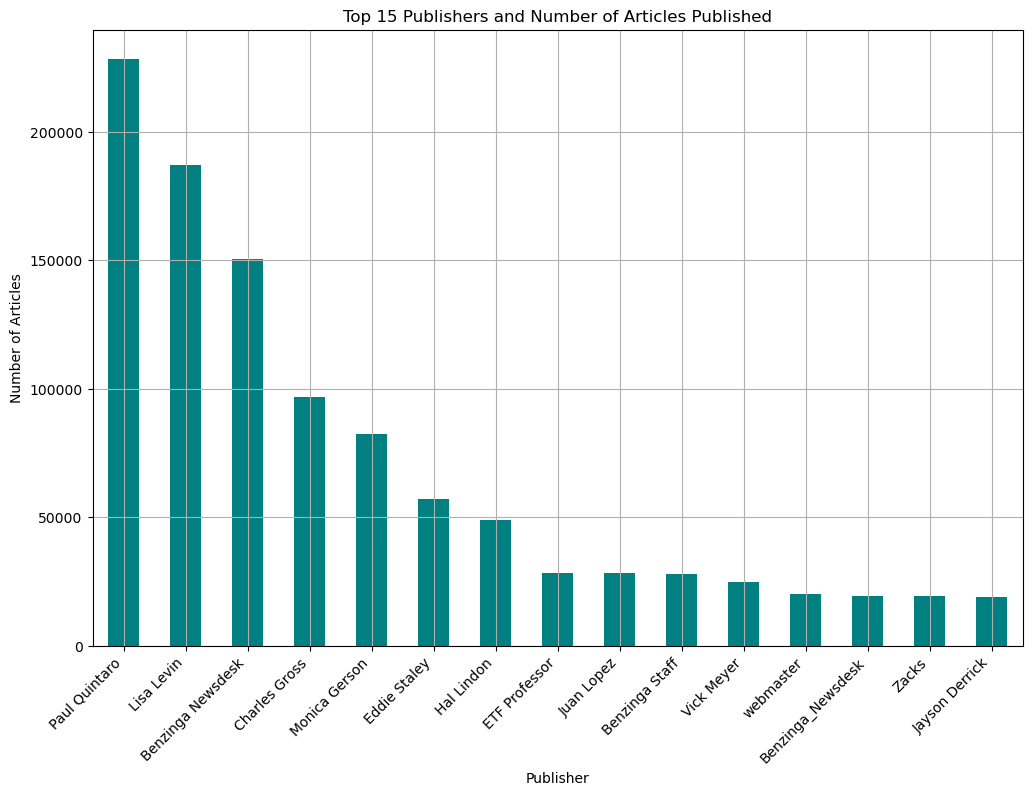

In [32]:
import matplotlib.pyplot as plt

# Step 1: Count the number of articles per publisher
articles_per_publisher = df['publisher'].value_counts()

# Step 2: Select the top 15 publishers
top_15_publishers = articles_per_publisher.head(15)

# Step 3: Plot the data
plt.figure(figsize=(12, 8))
top_15_publishers.plot(kind='bar', color='teal')
plt.title('Top 15 Publishers and Number of Articles Published')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(True)
plt.show()


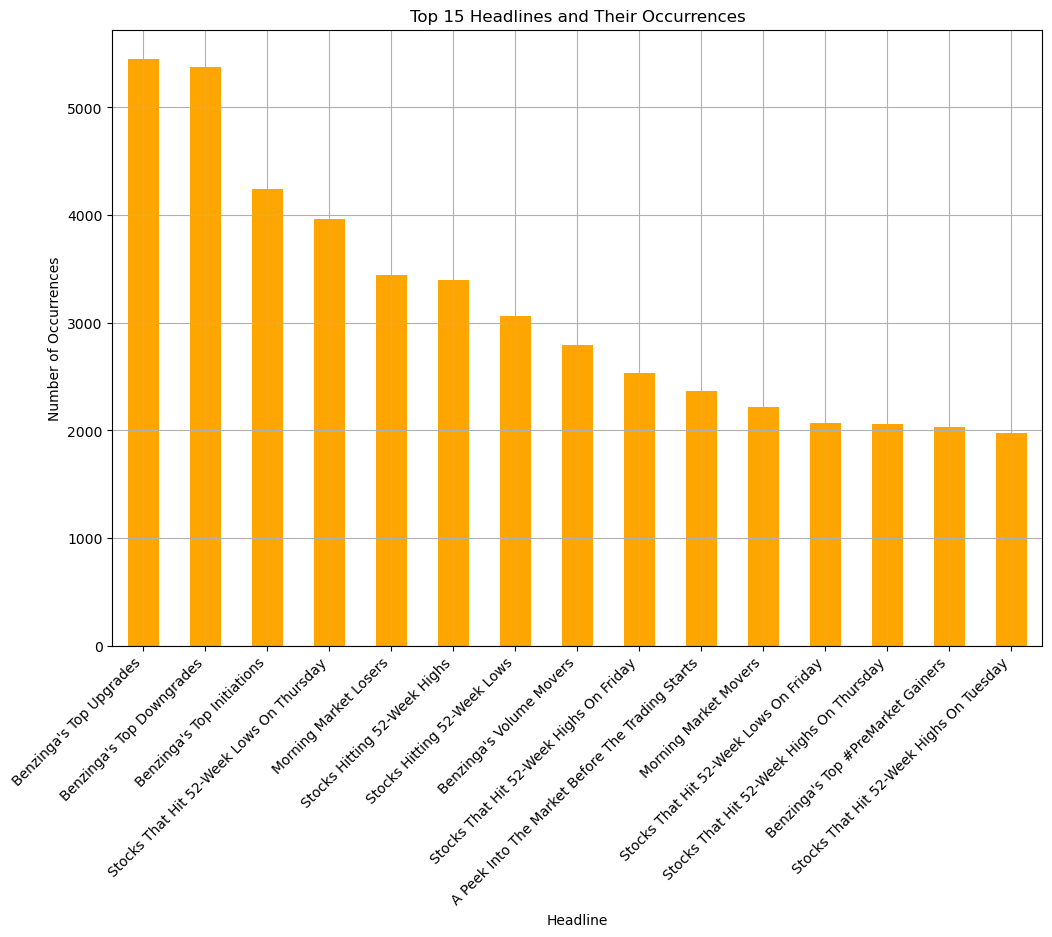

In [33]:
import matplotlib.pyplot as plt

# Step 1: Count the number of occurrences of each headline
headline_counts = df['headline'].value_counts()

# Step 2: Select the top 15 headlines
top_15_headlines = headline_counts.head(15)

# Step 3: Plot the data
plt.figure(figsize=(12, 8))
top_15_headlines.plot(kind='bar', color='orange')
plt.title('Top 15 Headlines and Their Occurrences')
plt.xlabel('Headline')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(True)
plt.show()


In [37]:
%pip install textblob joblib gensim 


  Using cached textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)
Using cached textblob-0.18.0.post0-py3-none-any.whl (626 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 714.0 kB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 351.7 kB/s eta 0:00:00m eta 0:00:010:00:04
Note: you may need to restart the kernel to use updated packages.


In [40]:
%pip install scikit-learn

from textblob import TextBlob
from joblib import Parallel, delayed
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 642.1 kB/s eta 0:00:00m eta 0:00:010:00:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [41]:
# Function for Sentiment Analysis using TextBlob
def get_sentiment(text):
    try:
        # Sentiment polarity: -1 (negative) to 1 (positive), categorize into positive, negative, neutral
        polarity = TextBlob(text).sentiment.polarity
        if polarity > 0:
            return 'positive'
        elif polarity < 0:
            return 'negative'
        else:
            return 'neutral'
    except Exception as e:
        return 'unknown'

# Function to perform sentiment analysis on the DataFrame in parallel
def sentiment_analysis_parallel(df, column):
    sentiments = Parallel(n_jobs=-1)(delayed(get_sentiment)(text) for text in df[column])
    return sentiments

In [45]:
# Apply parallel sentiment analysis
df['sentiment'] = sentiment_analysis_parallel(df, 'headlineClean')


In [46]:
sentiment_counts = df['sentiment'].value_counts()


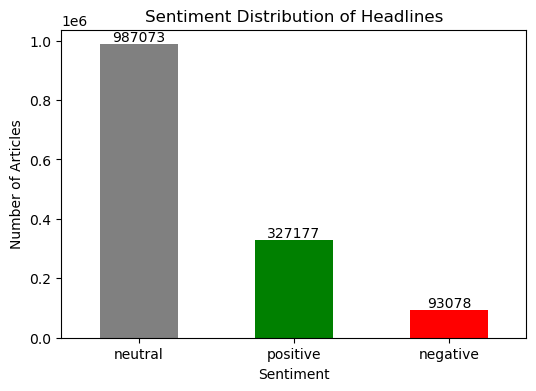

In [47]:
# Custom colors for each sentiment
colors = {'positive': 'green', 'negative': 'red', 'neutral': 'grey'}

# Plot the sentiment distribution
plt.figure(figsize=(6, 4))
ax = sentiment_counts.plot(kind='bar', color=[colors[sentiment] for sentiment in sentiment_counts.index])
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)

# Add the count above each bar
for i, count in enumerate(sentiment_counts):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

In [48]:
# ----------- Topic Modeling (LDA) ------------
# Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=nltk.corpus.stopwords.words('english'), max_df=0.95, min_df=2)
X = vectorizer.fit_transform(df['headlineClean'])


In [54]:
# Get the top keywords based on their TF-IDF scores
top_keywords = vectorizer.get_feature_names_out()

print("Top Keywords:", top_keywords)

Top Keywords: ['aal' 'aam' 'aba' ... 'zoom' 'zoster' 'zwanziger']


In [56]:
from sklearn.decomposition import LatentDirichletAllocation

# Fit the LDA model to find topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Print the topics and the top words associated with each topic
n_top_words = 10
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print([top_keywords[i] for i in topic.argsort()[:-n_top_words - 1:-1]])


Topic 1:
['earnings', 'biggest', 'week', 'hit', 'stock', 'yesterday', 'alert', 'option', 'outlook', 'analyst']
Topic 2:
['top', 'stock', 'session', 'moving', 'revenue', 'week', 'new', 'august', 'midday', 'set']
Topic 3:
['trading', 'higher', 'lower', 'news', 'deal', 'several', 'oil', 'company', 'update', 'new']
Topic 4:
['buy', 'target', 'update', 'price', 'neutral', 'coverage', 'morgan', 'market', 'bank', 'outperform']
Topic 5:
['watch', 'estimate', 'market', 'may', 'morning', 'stock', 'march', 'beat', 'yoy', 'trade']


In [57]:
# Step 5: Display the topics
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Print the top words for each topic
print_top_words(lda, feature_names, 10)

Topic #0:
earnings biggest week hit stock yesterday alert option outlook analyst
Topic #1:
top stock session moving revenue week new august midday set
Topic #2:
trading higher lower news deal several oil company update new
Topic #3:
buy target update price neutral coverage morgan market bank outperform
Topic #4:
watch estimate market may morning stock march beat yoy trade


In [58]:
# Display topics (top words in each topic)
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))


Topic 0:
earnings biggest week hit stock yesterday alert option outlook analyst
Topic 1:
top stock session moving revenue week new august midday set
Topic 2:
trading higher lower news deal several oil company update new
Topic 3:
buy target update price neutral coverage morgan market bank outperform
Topic 4:
watch estimate market may morning stock march beat yoy trade


In [66]:
import spacy
from concurrent.futures import ThreadPoolExecutor
from sklearn.feature_extraction.text import TfidfVectorizer
%pip install rake_nltk
from rake_nltk import Rake
import pandas as pd

# Load the pre-trained spaCy model
nlp = spacy.load("en_core_web_sm")

  Using cached rake_nltk-1.0.6-py3-none-any.whl.metadata (6.4 kB)
Using cached rake_nltk-1.0.6-py3-none-any.whl (9.1 kB)
Note: you may need to restart the kernel to use updated packages.
